In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [11]:
#
# Definir a entrada de agua
#
def controle_entrada(n):
    # Nivel da valvula
    # 0 -> 0
    # 1 -> 1 a 3
    # 2 -> 4 a 6
    # 3 -> 7 a 9
    # 4 -> 10 a 12
    # 5 -> 13 a 15
    nivel = 0
    vazao = 0
    
    t = np.arange(n)
    for i in range(0, n, 5):
        
        # Nível 0
        
        if(nivel == 0):
            vazao = random.randint(1, 3)
            t[i:i+5] = vazao
            nivel = 1
            
        # Nível 1
        
        elif(nivel == 1):
            # Condicao para verificar se vai subir, descer ou continuar
            # -1 para descer
            # 0 para continuar
            # 1 para subir
            condicao = random.randint(-1, 1)
            if(condicao == -1):
                vazao = 0
                t[i:i+5] = vazao
                nivel = 0
                
            elif(condicao == 0):
                t[i:i+5] = vazao
                
            elif(condicao == 1):
                vazao = random.randint(4, 6)
                t[i:i+5] = vazao
                nivel = 2
        # Nível 2
        
        elif(nivel == 2):
            condicao = random.randint(-1, 1)
            if(condicao == -1):
                vazao = random.randint(1, 3)
                t[i:i+5] = vazao
                nivel = 1
                
            elif(condicao == 0):
                t[i:i+5] = vazao
                
            elif(condicao == 1):
                vazao = random.randint(7, 9)
                t[i:i+5] = vazao
                nivel = 3
        
        # Nível 3
        
        elif(nivel == 3):
            condicao = random.randint(-1, 1)
            if(condicao == -1):
                vazao = random.randint(4, 6)
                t[i:i+5] = vazao
                nivel = 2
                
            elif(condicao == 0):
                t[i:i+5] = vazao
                
            elif(condicao == 1):
                vazao = random.randint(10, 12)
                t[i:i+5] = vazao
                nivel = 4
        
        
        # Nível 4
        
        elif(nivel == 4):
            condicao = random.randint(-1, 1)
            if(condicao == -1):
                vazao = random.randint(7, 9)
                t[i:i+5] = vazao
                nivel = 3
                
            elif(condicao == 0):
                t[i:i+5] = vazao
                
            elif(condicao == 1):
                vazao = random.randint(13, 15)
                t[i:i+5] = vazao
                nivel = 5
        
        # Nível 5
        
        elif(nivel == 5):
            condicao = random.randint(-1, 0)
            if(condicao == -1):
                vazao = random.randint(10, 12)
                t[i:i+5] = vazao
                nivel = 4
                
            elif(condicao == 0):
                t[i:i+5] = vazao
    return t
    
    

In [12]:
def controle_saida(d):
    A_1 = -60
    M_1 = -10
    B_1 = 0

    A_2 = -2.5
    M_2 = 2.5
    B_2 = 7.5

    A_3 = 5
    M_3 = 7.5
    B_3 = 10

    A_4 = 7.5
    M_4 = 15
    B_4 = 40

    #
    # Calcular antecedente

    # x = 
    ant = np.zeros(4)
    diferenca = d

    # Muito baixo
    if( (diferenca>= A_1) & (diferenca <=B_1)):
        if(diferenca <= M_1):
            ant[0] = 1
        else:
            ant[0] = ((1*(B_1-M_1)) - (1*(diferenca-M_1) ))/((B_1 - M_1))

    # Baixo
    if((diferenca >= A_2) & (diferenca <= B_2)):
        if(diferenca <= M_2):
            ant[1] = ((1)*(diferenca - A_2))/((M_2 - A_2))
        else:
            ant[1] = ( ((1)*(B_2-M_2)) - ((1)*(diferenca - M_2)) )/(B_2-M_2)

    # Medio
    if((diferenca >= A_3) & (diferenca <= B_3)):
        if(diferenca <= M_3):
            ant[2] = ((1)*(diferenca - A_3))/((M_3 - A_3))
        else:
            ant[2] = ( ((1)*(B_3-M_3)) - ((1)*(diferenca - M_3)) )/(B_3-M_3)

    #Alto
    if((diferenca >= A_4) & (diferenca <= B_4)):
        if(diferenca <= M_4):
            ant[3] = ((1)*(diferenca - A_4))/((M_4 - A_4))
        else:
            ant[3] = 1
            
            
            
    A_1 = 0
    M_1 = 0
    B_1 = 0

    A_2 = 0
    M_2 = 3.75
    B_2 = 7.5

    A_3 = 5
    M_3 = 8.75
    B_3 = 12.5

    A_4 = 10
    M_4 = 15
    B_4 = 15
    
    area = np.zeros(4)

    base_maior_2 = B_2 - A_2

    A_P_2 = M_2*ant[1] - A_2*ant[1] + A_2

    base_menor_2 = base_maior_2 - 2*(A_P_2 - A_2)


    base_maior_3 = B_3 - A_3

    A_P_3 = M_3*ant[2] - A_3*ant[2] + A_3

    base_menor_3 = base_maior_3 - 2*(A_P_3 - A_3)


    base_maior_4 = B_4 - A_4

    A_P_4 = M_4*ant[3] - A_4*ant[3] + A_4

    base_menor_4 = base_maior_4 - (A_P_4 - A_4)

    #Area muito baixa sempre 0


    #Area baixo

    area[1] = ( ((base_maior_2 + base_menor_2)*ant[1])/2)

    #Area meia

    area[2] = ( ((base_maior_3 + base_menor_3)*ant[2])/2)

    #Area alta

    area[3] = ( ((base_maior_4 + base_menor_4)*ant[3])/2)

    centroide = 0

    if( sum(area) != 0):
        centroide = ( (area[1]*M_2) + (area[2]*M_3) + (area[3]*((A_4+M_4)/2))  )/sum(area)
        if(ant[3] == 1):
            centroide = 15
        
    return centroide

In [41]:
# Tempo total do teste
tempo = 3000

# Altura que deseja permanecer - >0 a <=80
h_ideal = 60

# Altura atual
h_atual = np.zeros(tempo, dtype=int)

# Valvula de entrada
v_entrada = controle_entrada(tempo)

# Valvula de saída
v_saida = np.zeros(tempo)


In [14]:
valvula_nula = 0
valvula_baixa = 3
valvula_media = 8
valvula_alta = 15
h_anterior = 0

for i in range(tempo):
    
    h_atual[i] = h_anterior
    diferenca = h_atual[i] - h_ideal 
    
    # Regra 1 - se estiver com nível menor que o ideal valvula fechada
    if(diferenca <= 0):
        v_saida = valvula_nula
        h_atual[i] = h_atual[i] - v_saida
    
    # Regra 2 - se estiver com nívem acima do ideal entre 0 e 6
    elif( (diferenca > 0)  & (diferenca < 6)):
        v_saida = valvula_baixa
        h_atual[i] = h_atual[i] - v_saida
        
    # Regra 3 - se estiver com nívem acima do ideal entre 6 e 11
    elif((diferenca >= 6) & ( diferenca < 11)):
        v_saida = valvula_media
        h_atual[i] = h_atual[i] - v_saida
            
    # Regra 4 - se estiver com nívem acima do ideal entre 11 e 15
    elif((diferenca >= 11)):
        v_saida = valvula_alta
        h_atual[i] = h_atual[i] - v_saida
    
    h_atual[i] += v_entrada[i]
    h_anterior = h_atual[i]
    
            

In [119]:
valvula_nula = 0
valvula_baixa = 3
valvula_media = 8
valvula_alta = 15
h_anterior = 0

for i in range(tempo):
    
    h_atual[i] = h_anterior
    diferenca = h_atual[i] - h_ideal 
    
    #print(h_atual[i])
    
    v_saida[i] = controle_saida(diferenca)
#    if(diferenca > 10):
#        print(diferenca)
    h_atual[i] = h_atual[i] - v_saida[i]
    
    #print(h_atual[i])
#    print(h_atual[i], " - ", v_saida[i], " - ", diferenca)
#    print(v_saida)
#    if(i > 160):
#        print(h_atual[i])
#        print(diferenca, " - ", v_saida)
    
    h_atual[i] += v_entrada[i]
    h_anterior = h_atual[i]
    


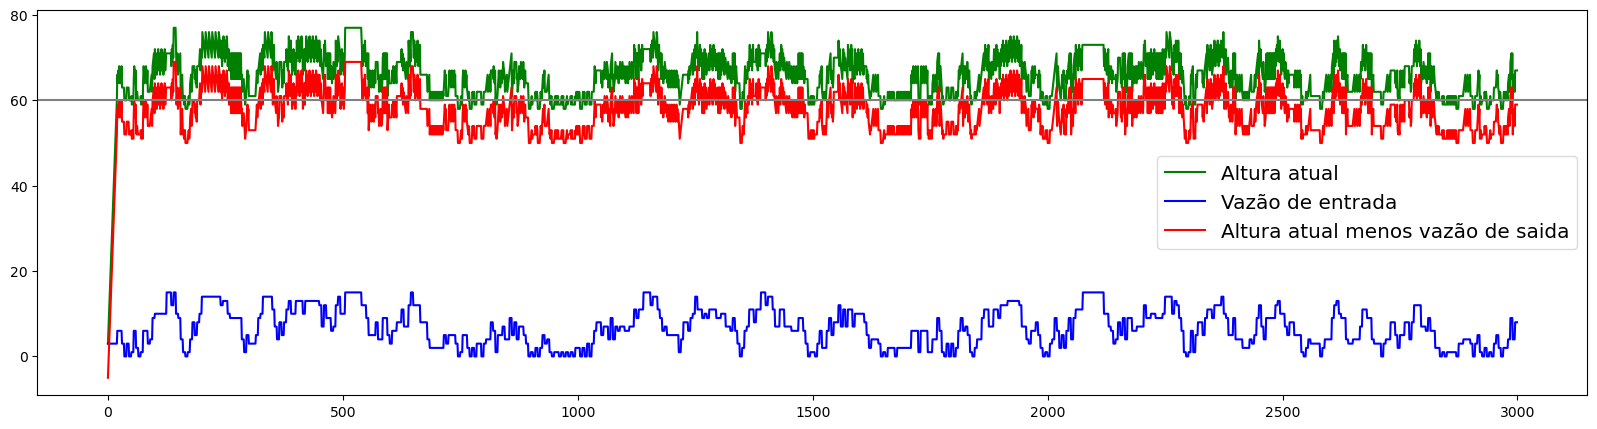

In [20]:
fig, ax = plt.subplots(figsize=(20, 5))
ax.plot(h_atual, color = 'green', label='Altura atual')
ax.plot(v_entrada, color = 'blue', label='Vazão de entrada')
ax.plot(h_atual-v_saida, color = 'red', label='Altura atual menos vazão de saida')
ax.axhline(y = 60, color = 'gray', linestyle = '-')

legend = ax.legend(loc='center right', shadow=False, fontsize='x-large', framealpha = 0.7)

plt.show()

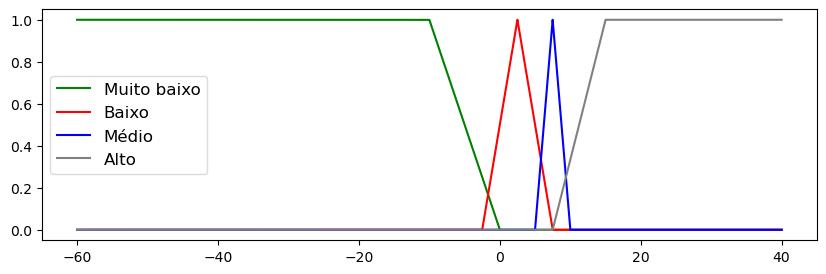

In [7]:
num_amostra = 48000

A_1 = -60
M_1 = -60
N_1 = -10
B_1 = 0

A_2 = -2.5
M_2 = 2.5
#N_2 = 7.5
B_2 = 7.5

A_3 = 5
M_3 = 7.5
B_3 = 10

A_4 = 7.5
M_4 = 15
#N_4 = 40
B_4 = 40

comprimento = B_4 - A_1


#a_1 = np.linspace(0,1,num = int(num_amostra*((M_1-A_1)/(B_3-A_1))))
b_1 = np.linspace(1,1,num = int(num_amostra*((N_1-M_1)/(comprimento))))
c_1 = np.linspace(1,0,num = int(num_amostra*((B_1-N_1)/(comprimento))))
d_1 = np.zeros(int(num_amostra*(B_4 - B_1)/(comprimento)))

eixo_y_1 = np.concatenate([b_1, c_1, d_1])

a_2 = np.zeros(int(num_amostra*(A_2 - A_1)/(comprimento)))
b_2 = np.linspace(0,1,num = int(num_amostra*((M_2-A_2)/(comprimento))))
c_2 = np.linspace(1,0,num = int(num_amostra*((B_2-M_2)/(comprimento))))
d_2 = np.zeros(int(num_amostra*(B_4 - B_2)/(comprimento)))

eixo_y_2 = np.concatenate([a_2, b_2, c_2, d_2])

a_3 = np.zeros(int(num_amostra*(A_3 - A_1)/(comprimento)))
b_3 = np.linspace(0,1,num = int(num_amostra*((M_3-A_3)/(comprimento))))
c_3 = np.linspace(1,0,num = int(num_amostra*((B_3-M_3)/(comprimento))))
d_3 = np.zeros(int(num_amostra*(B_4 - B_3)/(comprimento)))

eixo_y_3 = np.concatenate([a_3, b_3, c_3, d_3])


a_4 = np.zeros(int(num_amostra*(A_4 - A_1)/(comprimento)))
b_4 = np.linspace(0,1,num = int(num_amostra*((M_4-A_4)/(comprimento))))
c_4 = np.linspace(1,1,num = int(num_amostra*((B_4-M_4)/(comprimento))))
d_4 = np.zeros(int(num_amostra*(B_4 - B_4)/(comprimento)))

eixo_y_4 = np.concatenate([a_4, b_4, c_4, d_4])


eixo_x = np.linspace(A_1, B_4, num = num_amostra)

fig, ax = plt.subplots(figsize=(10,3))
ax.plot(eixo_x, eixo_y_1, color = 'green', label='Muito baixo')

ax.plot(eixo_x, eixo_y_2, color = 'red', label='Baixo')

ax.plot(eixo_x, eixo_y_3, color = 'blue', label='Médio')

ax.plot(eixo_x, eixo_y_4, color = 'gray', label='Alto')

legend = ax.legend(loc='center left', shadow=False, fontsize='large', framealpha = 0.7)

plt.show()

In [12]:
A_1 = -60
M_1 = -10
B_1 = 0

A_2 = -2.5
M_2 = 2.5
B_2 = 7.5

A_3 = 5
M_3 = 7.5
B_3 = 10

A_4 = 7.5
M_4 = 15
B_4 = 40

#
# Calcular antecedente

# x = 
ant = np.zeros(4)
#diferenca = 1

# Muito baixo
if( (diferenca>= A_1) & (diferenca <=B_1)):
    if(diferenca <= M_1):
        ant[0] = 1
    else:
        ant[0] = ((1*(B_1-M_1)) - (1*(diferenca-M_1) ))/((B_1 - M_1))
        
# Baixo
if((diferenca >= A_2) & (diferenca <= B_2)):
    if(diferenca <= M_2):
        ant[1] = ((1)*(diferenca - A_2))/((M_2 - A_2))
    else:
        ant[1] = ( ((1)*(B_2-M_2)) - ((1)*(diferenca - M_2)) )/(B_2-M_2)
        
# Medio
if((diferenca >= A_3) & (diferenca <= B_3)):
    if(diferenca <= M_3):
        ant[2] = ((1)*(diferenca - A_3))/((M_3 - A_3))
    else:
        ant[2] = ( ((1)*(B_3-M_3)) - ((1)*(diferenca - M_3)) )/(B_3-M_3)
        
#Alto
if((diferenca >= A_4) & (diferenca <= B_4)):
    if(diferenca <= M_4):
        ant[3] = ((1)*(diferenca - A_4))/((M_4 - A_4))
    else:
        ant[3] = 1

        

        
        

In [ ]:
#
# Consequente
#



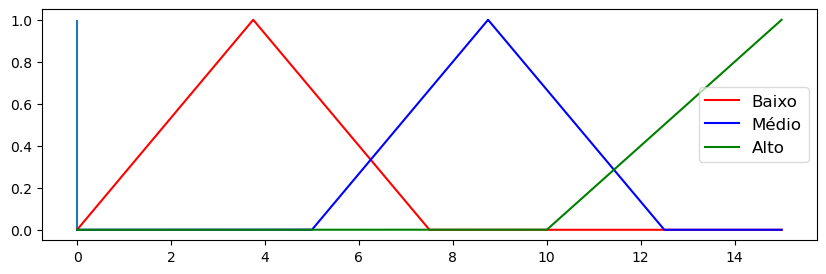

In [10]:
num_amostra = 48000

A_1 = 0
M_1 = 0
B_1 = 0

A_2 = 0
M_2 = 3.75
B_2 = 7.5

A_3 = 5
M_3 = 8.75
B_3 = 12.5

A_4 = 10
M_4 = 15
B_4 = 15

comprimento = B_4 - A_1


a_2 = np.zeros(int(num_amostra*(A_2 - A_1)/(comprimento)))
b_2 = np.linspace(0,1,num = int(num_amostra*((M_2-A_2)/(comprimento))))
c_2 = np.linspace(1,0,num = int(num_amostra*((B_2-M_2)/(comprimento))))
d_2 = np.zeros(int(num_amostra*(B_4 - B_2)/(comprimento)))

eixo_y_2 = np.concatenate([a_2, b_2, c_2, d_2])

a_3 = np.zeros(int(num_amostra*(A_3 - A_1)/(comprimento)))
b_3 = np.linspace(0,1,num = int(num_amostra*((M_3-A_3)/(comprimento))))
c_3 = np.linspace(1,0,num = int(num_amostra*((B_3-M_3)/(comprimento))))
d_3 = np.zeros(int(num_amostra*(B_4 - B_3)/(comprimento)))

eixo_y_3 = np.concatenate([a_3, b_3, c_3, d_3])


a_4 = np.zeros(int(num_amostra*(A_4 - A_1)/(comprimento)))
b_4 = np.linspace(0,1,num = int(num_amostra*((M_4-A_4)/(comprimento))))
c_4 = np.linspace(1,1,num = int(num_amostra*((B_4-M_4)/(comprimento))))
d_4 = np.zeros(int(num_amostra*(B_4 - B_4)/(comprimento)))

eixo_y_4 = np.concatenate([a_4, b_4, c_4, d_4])


eixo_x = np.linspace(A_1, B_4, num = num_amostra)

fig, ax = plt.subplots(figsize=(10,3))
#ax.plot(eixo_x, eixo_y_1, color = 'green', label='Função 1')

ax.vlines(x = 0, ymin = 0, ymax = 1)

ax.plot(eixo_x, eixo_y_2, color = 'red', label='Baixo')

ax.plot(eixo_x, eixo_y_3, color = 'blue', label='Médio')

ax.plot(eixo_x, eixo_y_4, color = 'green', label='Alto')

legend = ax.legend(loc='center right', shadow=False, fontsize='large', framealpha = 0.7)



plt.show()

In [18]:
A_1 = 0
M_1 = 0
B_1 = 0

A_2 = 0
M_2 = 3.75
B_2 = 7.5

A_3 = 5
M_3 = 8.75
B_3 = 12.5

A_4 = 10
M_4 = 15
B_4 = 15

area = np.zeros(4)

base_maior_2 = B_2 - A_2

A_P_2 = M_2*ant[1] - A_2*ant[1] + A_2

base_menor_2 = base_maior_2 - 2*A_P_2


base_maior_3 = B_3 - A_3

A_P_3 = M_3*ant[2] - A_3*ant[2] + A_3

base_menor_3 = base_maior_3 - 2*A_P_3


base_maior_4 = B_4 - A_4

A_P_4 = M_4*ant[3] - A_4*ant[3] + A_4

base_menor_4 = base_maior_4 - 2*A_P_4

#Area muito baixa sempre 0


#Area baixo

area[1] = ( ((base_maior_2 + base_menor_2)*ant[1])/2)

#Area meia

area[2] = ( ((base_maior_3 + base_menor_3)*ant[2])/2)

#Area alta

area[3] = ( ((base_maior_4 + base_menor_4)*ant[3])/2)

centroide = 0

if( sum(area) != 0):
    centroide = ( (area[1]*M_2) + (area[2]*M_3) + (area[3]*((A_4+M_4)/2))  )/sum(area)



In [118]:
print("Index   |  Vazão Saída  |  Altura Atual  |  Altura - Vazão\n")
h_atual_saida = h_atual - v_saida
for i in range(50, 60):
    
    print(i, "      -      ", round(v_saida[i], 2), "   -    ", h_atual[i], "         -    ", round(h_atual_saida[i], 2) )

for i in range(500, 510):
    
    print(i, "     -      ", round(v_saida[i], 2), "   -    ", h_atual[i],"         -    ", round(h_atual_saida[i], 2) )
    
    
    
for i in range(1000, 1010):
    
    print(i, "    -      ", round(v_saida[i], 2), "   -    ", h_atual[i],"         -    ", round(h_atual_saida[i], 2))
    

Index   |  Vazão Saída  |  Altura Atual  |  Altura - Vazão

50       -       9.06    -     65          -     55.94
51       -       3.75    -     68          -     64.25
52       -       9.06    -     65          -     55.94
53       -       3.75    -     68          -     64.25
54       -       9.06    -     65          -     55.94
55       -       3.75    -     68          -     64.25
56       -       9.06    -     65          -     55.94
57       -       3.75    -     68          -     64.25
58       -       9.06    -     65          -     55.94
59       -       3.75    -     68          -     64.25
500      -       3.75    -     70          -     66.25
501      -       12.5    -     66          -     53.5
502      -       6.53    -     68          -     61.47
503      -       9.06    -     67          -     57.94
504      -       7.92    -     68          -     60.08
505      -       9.06    -     62          -     52.94
506      -       3.75    -     62          -     58.25
507   